In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
df = pd.read_csv(r"C:\Users\OWNER1\Desktop\Nenchin\WORKS\Python\py-master\ML\19_Bagging\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Checking for inblance in the outcome

In [4]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

there is slight inbalance

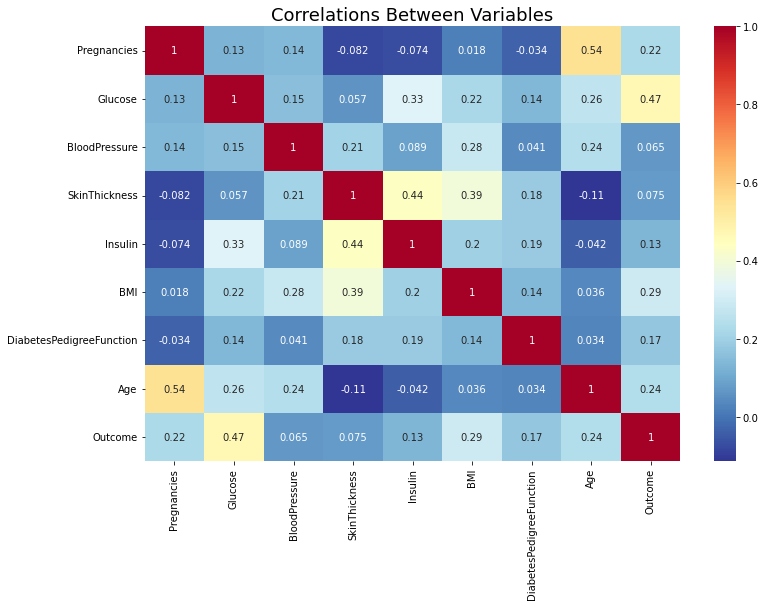

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),fmt=".2g", cmap="RdYlBu_r", annot=True)
plt.title("Correlations Between Variables", size=18)
plt.show()

In [10]:
X = df.drop(["Outcome"], axis=1)
y = df.Outcome

In [11]:
scaler = StandardScaler()

In [12]:
X_scaler = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, stratify=y, random_state=10)

stratify was used because of the slight inbalance in the dataset, so that the train and test will have almost equal number of datasets

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(576, 8) (192, 8) (576,) (192,)


In [15]:
y_train.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

In [16]:
cval = cross_val_score(DecisionTreeClassifier(),X_train, y_train, cv=5)

In [17]:
cval

array([0.6637931 , 0.66086957, 0.71304348, 0.77391304, 0.68695652])

In [18]:
cval.mean()

0.6997151424287856

# Using Bagging Classifier

In [19]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
     n_estimators=100,
    max_samples=0.8,
    bootstrap=True,
    oob_score=True,
    random_state=0
)

In [19]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [20]:
bag_clf.oob_score_

0.7534722222222222

In [21]:
bag_clf.score(X_test,y_test)

0.7760416666666666

In [22]:
cval = cross_val_score(
    bag_clf,
    X_train,
    y_train,
    cv=5
)

In [23]:
cval

array([0.71551724, 0.75652174, 0.75652174, 0.7826087 , 0.76521739])

In [24]:
cval.mean()

0.7552773613193403